# Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [2]:
from sklearn import tree 

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value.

In [3]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]] #TRAINING SET (EXAMPLES)
Y = [1, 0, 0, 0, 1, 1]  #TRAINING SET (LABELS)

Declare the classification model you want to use and then fit the model to the data

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

[1]


Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [4]:
print(clf.predict([[0, 1, 1]])) #Esempi non noti

[0]


In [5]:
print(clf.predict([[1, 0, 1],[0, 0, 1]])) #Esempi ignoti

[1 0]


# Descrizione del Dataset
## X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
## Y = [1, 0, 0, 0, 1, 1]

So we've n+ = 3 and n-=3, the result can be 1 or 0 so we're in a binary case:
Abbiamo 3 esempi positivi (valore = 1, n+) e 3 valori negativi (valore = 0, n-). Siamo in un caso binario quindi il valore può essere 0 o 1. 

**p => Empirical Probability (probabilità empirica)**

**p = (n+)/(n+(+)n-) = 3/6 = 0.5 --> GINI INDEX**

Lo split viene eseguito su una condizione: Se X[n] (elemento dell'array) è maggiore/minoreminore di 0,5. 
Dopo uno split se il gini index non è = a 0 allora rieseguo un altro split esaminando un'altro elemento dell'array, altrimenti etichettiamo la foglia con la label del valore corrispondente.

In [8]:
import graphviz 

#crea uno script in DOT, linguaggio usato per descrivere grafici
dot_data = tree.export_graphviz(clf, out_file=None) 

graph = graphviz.Source(dot_data)  
graph

ModuleNotFoundError: No module named 'graphviz'

# Descrizione albero:
Nel primo nodo abbiamo un gini index di 0.5, che è il valore peggiore che possiamo predirre in un caso binario. Dopo di che esaminiamo le feature (seguendo l'ordine 1,2 e 3 **?** ) ed eseguiamo gli split. Visto che ci sono solo 2 possibili valori che possono assumere le features ogni taglio genererà solamente 2 nodi.

# Iris Dataset
## In the following we start using a dataset (from UCI Machine Learning repository)

Il dataset è composto da fiori. I fiori hanno associati a loro 4 valori.

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
print(len(iris.data))

# print(iris.data)
# print(iris.target)
# print(iris)


150


# Declare the type of prediction model and the working criteria for the model induction algorithm 

**criterion**: Qui usiamo l'**Entropia** invece del gini index

**random_state**: per fissare la randomizzazione e quindi ottenere un comportamento deterministico per la randomizzazione

**min_samples_leaf**: una foglia dovrà contenere ALMENO 5 esempi per esistere (cosi si evita overfitting)

**class_weight**: Associamo un peso ad ognuna delle tre classi, in questo caso le classi hanno tutte lo stesso peso, pari a 1. 
N.B. in questo caso non ci sono più i *falsi positivi* (**FP**) e i *falsi negativi* (**FN**).

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Split the dataset in training and test set

## Randomizziamo il dataset e splittiamo in *test* e *training set*

In [ ]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10] #INDICI TRAINING SET: PRIMI 140 ELEMENTI DEL VETTORE RANDOM
indices_test=indices[-10:] #INDICI TEST SET: ULTIMI 10 ELEMENTI DEL VETTORE RANDOM

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]



# Fit the learning model on training set

In [ ]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Obtain predictions

In [ ]:
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

## Da notare l'errore sul secondo esempio che è stato predetto in maniera errata.

Print the index of the test instances and the corresponding predictions

In [ ]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+" ["+
                        ("OK" if iris.target_names[predicted_y_test[i]]==iris.target_names[iris_y_test[i]] else "NOT OK")
          +"]\n")

# Look at the specific examples (TEST SET)

In [ ]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test)+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"                                              \t["+
                        ("OK" if iris.target_names[predicted_y_test[i]]==iris.target_names[iris_y_test[i]] else "NOT OK")
          +"]\n")

# Obtain model performance results

F1 is a balanced average of the accuracy_score of the model. Is another way to evaluate the average

In [ ]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))
#'macro' = MEDIA NON PESATA DELLO SCORE SU OGNI CLASSE 
#       (OVVERO: ESEMPI PESATI TUTTI ALLO STESSO MODO) 
#       --> MEGLIO, SOPRATTUTTO SE LE DISTRIBUZIONI SONO DIFFERENTI!
#'micro' = MEDIA CALCOLATA GLOBALMENTE SUI TP, FN, FP

# Use Cross Validation (5 FOLDS)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

In [ ]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

# Show the resulting tree 

## 1. Print the picture in a PDF file

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")

## 2. Generate a picture here

In [ ]:
print(list(iris.feature_names))
print(list(iris.target_names))

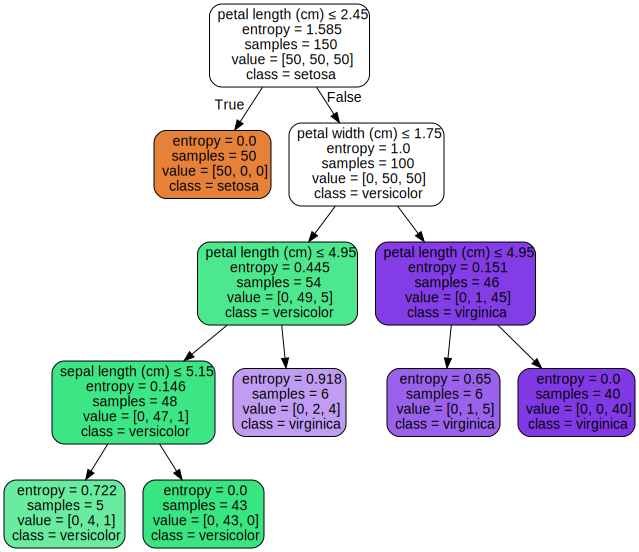

In [28]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
#help(tree._tree.Tree)

#NODI BIANCHI: ENTROPIA MOLTO ALTA (NON HOMOGENEOUS)
#NODI ARANCIONI: SETOSA
#NODI VERDI: VERSICOLOR
#NODI VIOLA: VIRGINICA

#IL COLORE E' PIU DENSO --> L'ENTROPIA E' MINORE

# Your work: what you have to do
Modify the given Jupyter notebook on decision trees on Iris data and perform the following tasks:

1. get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica or versicolor which are more difficult to discriminate). Learn the tree in these conditions.
1. b) modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor or vice versa) and learn the tree in these conditions. You should obtain similar results as for step 1.
2. learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.
3. build the confusion matrix of the created tree models on the test set and show them. 
4. build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.

## 1. Artificial Inflaction

Get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica e versicolor which are more difficult to discriminate). Learn the tree in these conditions.
    1.b) modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor and vice              versa) and learn the tree in these conditions. You should obtain similar results as for step 1.

Artificial inflation: tecnica che consiste nell’aumentare le istanze di una classe dentro
una foglia per coprire la differenza di costi (tipo moltiplicare per 10 il numero di classi
positive)

In [2]:
TESTSET_SIZE = 20
INFLATION_FACTOR = 20   #1A
WEIGHT_FACTOR = 20      #1B
AVG = 'macro'

In [3]:
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# creo il classificatore (1a)
clf_1a = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1}) 
# creo il classificatore (1b) coi pesi ricalibrati per versicolor, virginica
clf_1b = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:WEIGHT_FACTOR,2:WEIGHT_FACTOR}) 
                                                                                                        #0:setosa, 1:versicolor, 2:virginica

# creo il dataset
iris = load_iris()
X = iris.data
y = iris.target
for i, n in enumerate(iris.target_names):
    print(i, "-->", n)

# divido in trainingset e testset con random permutation, (1a) effettuo art.inflation sul training set x10 per versicolor, virginica
np.random.seed(0)
indices = np.random.permutation(len(X))
indices_train = indices[:-TESTSET_SIZE]
indices_test = indices[-TESTSET_SIZE:]
X_train = X[indices_train]
y_train = y[indices_train]
X_test  = X[indices_test]
y_test  = y[indices_test]
X_train_inflated = X_train
y_train_inflated = y_train
for i in range(len(X_train)):
    if y_train[i] == 1 or y_train[i] == 2:
        for j in range(INFLATION_FACTOR):
            X_train_inflated = np.append(X_train_inflated, [X_train[i]], 0)
            y_train_inflated = np.append(y_train_inflated, [y_train[i]], 0)
print("TRAINING SET SHAPE: X", X_train.shape, "y", y_train.shape)
print("TRAINING SET SHAPE (WITH INFLATION x"+str(INFLATION_FACTOR)+"): X", X_train_inflated.shape, "y", y_train_inflated.shape)
print("TEST SET SIZE:", TESTSET_SIZE)

# apprendimento su trainingset
clf_1a.fit(X_train_inflated, y_train_inflated)
clf_1b.fit(X_train, y_train)

# evaluation su testset
y_test_pred_1a = clf_1a.predict(X_test)
y_test_pred_1b = clf_1b.predict(X_test)
print("Predictions on test set:")
print(y_test_pred_1a, "(1A)")
print(y_test_pred_1b, "(1B)")
print("True classes:")
print(y_test) 
print("Errors (1A):")
print(np.array([0 if a==b else 1 for (a,b) in list(zip(y_test_pred_1a,y_test))]))
print("Errors (1B):")
print(np.array([0 if a==b else 1 for (a,b) in list(zip(y_test_pred_1b,y_test))]))

# accuracy e f1 score
acc_score_1a = accuracy_score(y_test, y_test_pred_1a)
acc_score_1b = accuracy_score(y_test, y_test_pred_1b)
print("Accuracy score (1A): ", acc_score_1a)
print("Accuracy score (1B): ", acc_score_1b)
f1_score_1a = f1_score(y_test, y_test_pred_1a, average=AVG)
f1_score_1b = f1_score(y_test, y_test_pred_1b, average=AVG)
print("F1 score (1A) ("+AVG+"): ", f1_score_1a)
print("F1 score (1B) ("+AVG+"): ", f1_score_1b)

0 --> setosa
1 --> versicolor
2 --> virginica
TRAINING SET SHAPE: X (130, 4) y (130,)
TRAINING SET SHAPE (WITH INFLATION x20): X (1850, 4) y (1850,)
TEST SET SIZE: 20
Predictions on test set:
[2 2 1 2 0 1 2 2 0 1 1 2 1 0 0 0 2 1 2 0] (1A)
[2 2 1 2 0 1 2 2 0 1 1 2 1 0 0 0 2 1 2 0] (1B)
True classes:
[2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]
Errors (1A):
[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Errors (1B):
[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy score (1A):  0.9
Accuracy score (1B):  0.9
F1 score (1A) (macro):  0.9047619047619048
F1 score (1B) (macro):  0.9047619047619048


## 2, 3. TUNE HYPER PARAMETERS TO PRODUCE DIFFERENT CLFs, BUILD CONFUSION MATRIXES

- Learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.
- Build the confusion matrix of the created tree models on the test set and show them. 

In [4]:
WEIGHT_FACTOR_SETOSA = 1
WEIGHT_FACTOR_VERSICOLOR = 10
WEIGHT_FACTOR_VIRGINICA = 10
MIN_SAMPLES_LEAF = 5
MAX_LEAVES = 10
MAX_DEPTH = 10
MIN_IMPURITY = 0
CRITERION = 'entropy' #'gini'
AVG = 'macro'

Predictions on test set:
[2 2 1 2 0 1 2 2 0 1 1 2 1 0 0 0 2 1 2 0] (2)
True classes:
[2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]
Errors (2):
[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy score (2):  0.9
F1 score (2) (macro):  0.9047619047619048


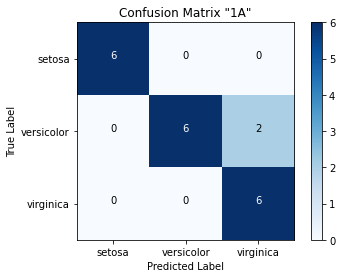

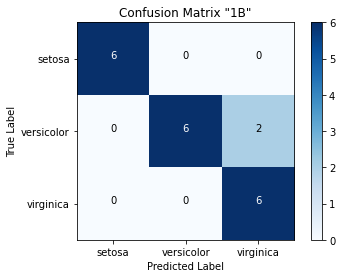

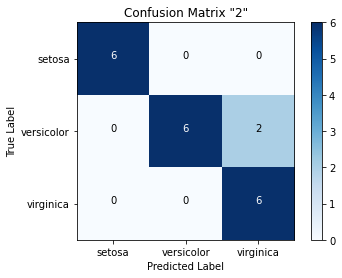

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

# confusion matrix function
def draw_confusion_matrix(class_names,y_test,y_test_pred,clf_label):
    cf = confusion_matrix(y_test,y_test_pred)
    plt.figure()
    plt.imshow(cf, cmap=plt.cm.Blues)
    plt.title("Confusion Matrix \""+clf_label+"\"")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    thresh = cf.max() / 2.0
    for i, j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
        plt.text(j, i, cf[i, j],horizontalalignment="center",color="white" if cf[i, j] > thresh else "black",)
    plt.colorbar()
    plt.show()

#tune hyper parameters to produce different clf
clf_2 = tree.DecisionTreeClassifier(criterion=CRITERION,random_state=0,min_samples_leaf=MIN_SAMPLES_LEAF,max_depth=MAX_DEPTH,class_weight={0:WEIGHT_FACTOR_SETOSA,1:WEIGHT_FACTOR_VERSICOLOR,2:WEIGHT_FACTOR_VIRGINICA},max_leaf_nodes=MAX_LEAVES,min_impurity_decrease=MIN_IMPURITY) 

# apprendimento su trainingset
clf_2.fit(X_train, y_train)

# evaluation su testset
y_test_pred_2 = clf_2.predict(X_test)
print("Predictions on test set:")
print(y_test_pred_2, "(2)")
print("True classes:")
print(y_test)
print("Errors (2):")
print(np.array([0 if a==b else 1 for (a,b) in list(zip(y_test_pred_2,y_test))]))

# accuracy e f1 score
acc_score_2 = accuracy_score(y_test, y_test_pred_2)
print("Accuracy score (2): ", acc_score_2)
f1_score_2 = f1_score(y_test, y_test_pred_2, average=AVG)
print("F1 score (2) ("+AVG+"): ", f1_score_2)

# draw matrixes of all the models
class_names = iris.target_names
draw_confusion_matrix(class_names,y_test,y_test_pred_1a,"1A")
draw_confusion_matrix(class_names,y_test,y_test_pred_1b,"1B")
draw_confusion_matrix(class_names,y_test,y_test_pred_2,"2")


## 4. Build ROC Curves

Build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.

Predictions on test set: 		 [2 2 1 2 0 1 2 2 0 1 1 2 1 0 0 0 2 1 2 0] (1A)
True classes:				 [2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]
Errors (1A):				 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


Predictions on test set - SETOSA :	 [0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1] (1A)
True classes - SETOSA:			 [0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1]
Errors (1A):				 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Predictions on test set - VERSICOLOR :	 [0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0] (1A)
True classes - VERSICOLOR:		 [0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0]
Errors (1A):				 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]

Predictions on test set - VIRGINICA :	 [1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0] (1A)
True classes - VIRGINICA:		 [1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0]
Errors (1A):				 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


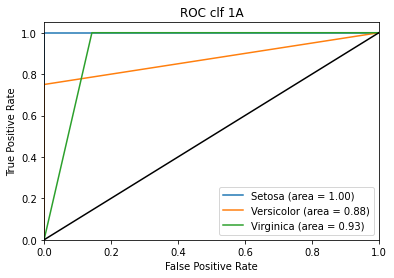

Predictions on test set: 		 [2 2 1 2 0 1 2 2 0 1 1 2 1 0 0 0 2 1 2 0] (1B)
True classes:				 [2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]
Errors (1B):				 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


Predictions on test set - SETOSA :	 [0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1] (1B)
True classes - SETOSA:			 [0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1]
Errors (1B):				 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Predictions on test set - VERSICOLOR :	 [0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0] (1B)
True classes - VERSICOLOR:		 [0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0]
Errors (1B):				 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]

Predictions on test set - VIRGINICA :	 [1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0] (1B)
True classes - VIRGINICA:		 [1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0]
Errors (1B):				 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


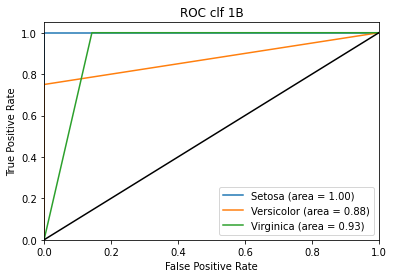

Predictions on test set: 		 [2 2 1 2 0 1 2 2 0 1 1 2 1 0 0 0 2 1 2 0] (2)
True classes:				 [2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]
Errors (2):				 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


Predictions on test set - SETOSA :	 [0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1] (2)
True classes - SETOSA:			 [0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1]
Errors (2):				 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Predictions on test set - VERSICOLOR :	 [0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0] (2)
True classes - VERSICOLOR:		 [0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0]
Errors (2):				 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]

Predictions on test set - VIRGINICA :	 [1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0] (2)
True classes - VIRGINICA:		 [1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0]
Errors (2):				 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


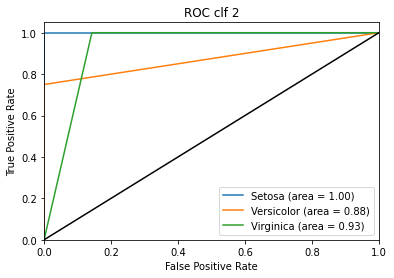

In [7]:
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

def bin_convert(y,positive_label):
    return np.where(y==positive_label,1,0)

def draw_3_roc_curves(y_test_setosa,predicted_y_test_setosa,y_test_versicolor,predicted_y_test_versicolor,y_test_virginica,predicted_y_test_virginica,name):
    plt.figure()
    fpr, tpr, _ = roc_curve(y_test_setosa, predicted_y_test_setosa)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label="Setosa (area = %0.2f)" % roc_auc)
    fpr, tpr, _ = roc_curve(y_test_versicolor, predicted_y_test_versicolor)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label="Versicolor (area = %0.2f)" % roc_auc)
    fpr, tpr, _ = roc_curve(y_test_virginica, predicted_y_test_virginica)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label="Virginica (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], "k")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC clf "+name)
    plt.legend(loc="lower right")
    plt.show()

def build_roc_plot_3_classes_binary(y_test,predicted_y_test,name):
    y_test_setosa = bin_convert(y_test,0)
    predicted_y_test_setosa = bin_convert(predicted_y_test,0)
    y_test_versicolor = bin_convert(y_test,1)
    predicted_y_test_versicolor = bin_convert(predicted_y_test,1)
    y_test_virginica = bin_convert(y_test,2)
    predicted_y_test_virginica = bin_convert(predicted_y_test,2)

    print("Predictions on test set:","\t\t", predicted_y_test,"("+name+")")
    print("True classes:\t\t\t\t", y_test)
    print("Errors ("+name+"):\t\t\t\t", np.array([0 if a==b else 1 for (a,b) in list(zip(predicted_y_test,y_test))]))
    print()
    print()
    print("Predictions on test set - SETOSA",":\t", predicted_y_test_setosa,"("+name+")")
    print("True classes - SETOSA:\t\t\t", y_test_setosa)
    print("Errors ("+name+"):\t\t\t\t", np.array([0 if a==b else 1 for (a,b) in list(zip(predicted_y_test_setosa,y_test_setosa))]))
    print()
    print("Predictions on test set - VERSICOLOR",":\t", predicted_y_test_versicolor,"("+name+")")
    print("True classes - VERSICOLOR:\t\t", y_test_versicolor)
    print("Errors ("+name+"):\t\t\t\t", np.array([0 if a==b else 1 for (a,b) in list(zip(predicted_y_test_versicolor,y_test_versicolor))]))
    print()
    print("Predictions on test set - VIRGINICA",":\t", predicted_y_test_virginica,"("+name+")")
    print("True classes - VIRGINICA:\t\t", y_test_virginica)
    print("Errors ("+name+"):\t\t\t\t", np.array([0 if a==b else 1 for (a,b) in list(zip(predicted_y_test_virginica,y_test_virginica))]))

    draw_3_roc_curves(y_test_setosa,predicted_y_test_setosa,y_test_versicolor,predicted_y_test_versicolor,y_test_virginica,predicted_y_test_virginica,name)

build_roc_plot_3_classes_binary(y_test,y_test_pred_1a,"1A")
build_roc_plot_3_classes_binary(y_test,y_test_pred_1b,"1B")
build_roc_plot_3_classes_binary(y_test,y_test_pred_2,"2")